In [165]:
from sklearn import datasets ,model_selection ,preprocessing ,linear_model ,metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = datasets.load_diabetes()
x = dataset.data
y = dataset.target
x.shape,y.shape

((442, 10), (442,))

In [4]:
y_normalize = preprocessing.MinMaxScaler()
y_norm = y_normalize.fit_transform(y.reshape(-1,1))

x_normalize = preprocessing.StandardScaler()
x_norm = x_normalize.fit_transform(x)

x_norm.shape,y_norm.shape

((442, 10), (442, 1))

In [27]:
_x=np.array([600,800,1000,1200,1400,1600,1800,2000])
_y=np.array([150,160,190,210,200,250,280,290])
_x = _x.reshape(-1, 1)  
_y = _y.reshape(-1, 1) 

x_train,x_test,y_train,y_test = model_selection.train_test_split(
    _x,_y,random_state=42,test_size=0.2
)

In [36]:
model = linear_model.LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(metrics.mean_squared_error(y_test, y_pred))

19.60000000000008


In [29]:
new_test = np.array([[1500]])
pred = model.predict(new_test)
print(pred)

[[237.]]


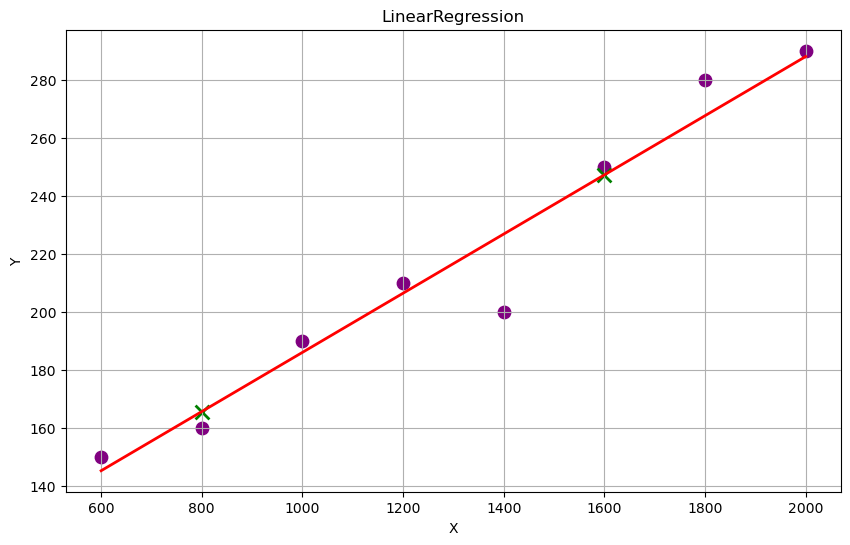

In [39]:
plt.figure(figsize=(10, 6))

x_line = np.linspace(600, 2000, 100).reshape(-1, 1)
y_line = model.predict(x_line)
plt.scatter(_x, _y, color='purple', s=80)
plt.plot(x_line, y_line, color='red', linewidth=2)

plt.scatter(x_test, y_pred, color='green', s=100, marker='x', linewidth=2)

plt.xlabel('X')
plt.ylabel('Y')
plt.title("LinearRegression")
# plt.legend()
plt.grid(True)
plt.show()

##

In [40]:
cancer = datasets.load_breast_cancer()
x = cancer.data
y = cancer.target
x.shape,y.shape

((569, 30), (569,))

In [41]:
x_normalize=preprocessing.StandardScaler()
x_norm=x_normalize.fit_transform(x)

In [56]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x_norm,y,test_size=0.5,random_state=42,stratify=y)

In [57]:
lr = linear_model.LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [58]:
y_pred = lr.predict(x_test)

In [59]:
metrics.accuracy_score(y_test,y_pred)

0.9754385964912281

In [60]:
cancer = datasets.load_breast_cancer()
x = cancer.data
y = cancer.target
x.shape,y.shape

((569, 30), (569,))

In [61]:
x_normalize=preprocessing.StandardScaler()
x_norm=x_normalize.fit_transform(x)

In [152]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x_norm,y,test_size=0.099,random_state=42,stratify=y)

In [157]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [158]:
y_pred = knn.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.9824561403508771

*Assignment*

In [192]:
df=pd.read_csv("housing_data.csv")
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   square_footage           1000 non-null   int64  
 1   bedrooms                 1000 non-null   int64  
 2   bathrooms                1000 non-null   float64
 3   year_built               1000 non-null   int64  
 4   distance_to_city_center  1000 non-null   float64
 5   has_garage               1000 non-null   int64  
 6   price                    1000 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 54.8 KB
None
       square_footage     bedrooms    bathrooms   year_built  \
count     1000.000000  1000.000000  1000.000000  1000.000000   
mean      2009.162000     3.191000     1.990500  1985.096000   
std        489.602333     0.862127     0.551329    20.152044   
min        379.000000     2.000000     1.000000  1950.000000   
25%       1675.500000     3.00000

In [ ]:
x = df.iloc[:, :-1]
x_original = df.iloc[:, :-1] 
y = df.iloc[:, -1] 

In [226]:
print("=== فحص البيانات الأصلية ===")
print(f"أبعاد x: {x.shape}")
print(f"أبعاد y: {y.shape}")
print(f"القيم الفريدة في y: {np.unique(y)}")
print(f"توزيع y: {pd.Series(y).value_counts()}")

=== فحص البيانات الأصلية ===
أبعاد x: (1000, 6)
أبعاد y: (1000,)
القيم الفريدة في y: [214023 215881 257673 267358 280994 297246 304445 304625 308905 311245
 315476 318546 325337 326325 328354 336431 337057 338257 340978 341469
 347376 348427 349836 353883 356993 358263 359290 360149 361023 362262
 364863 365787 368294 368454 370108 370658 370735 371247 371556 372291
 372888 373157 373210 373786 374284 375341 375817 378005 379309 379317
 379731 379990 380022 380613 381169 381628 382286 382584 383304 385659
 385721 386166 386437 386540 387817 387977 388562 388630 388880 389324
 389675 389744 393854 395555 395636 395761 395907 396174 396886 397558
 398404 398432 398695 398763 399049 399093 399203 399741 399930 400253
 400874 401559 402109 402118 402133 402628 403044 403129 404268 404741
 404868 404947 405151 405317 406460 406560 407076 407226 407372 407834
 408082 408806 409316 410438 410634 411141 411661 412115 412552 412651
 412854 412894 413245 413380 414123 415358 416000 416602 417623

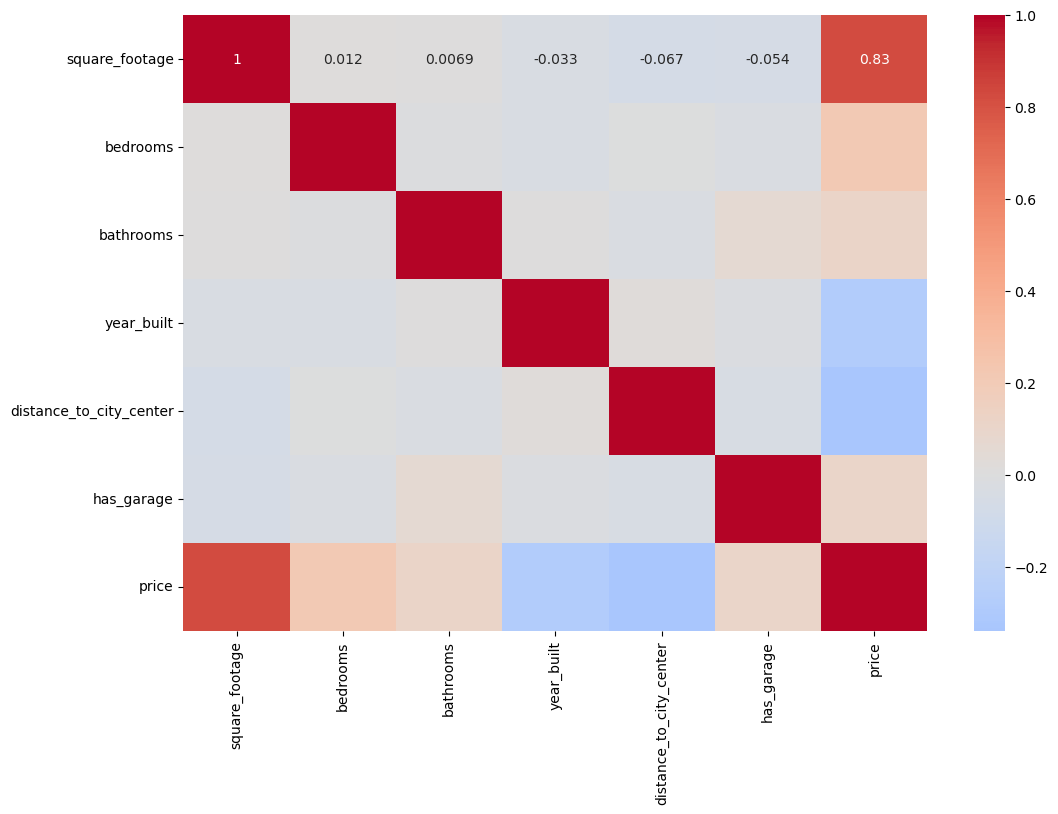

price                      1.000000
square_footage             0.825564
bedrooms                   0.211857
bathrooms                  0.114707
has_garage                 0.104428
year_built                -0.283055
distance_to_city_center   -0.338972
Name: price, dtype: float64


In [227]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

if 'price' in df.columns:
    print(df.corr()['price'].sort_values(ascending=False))

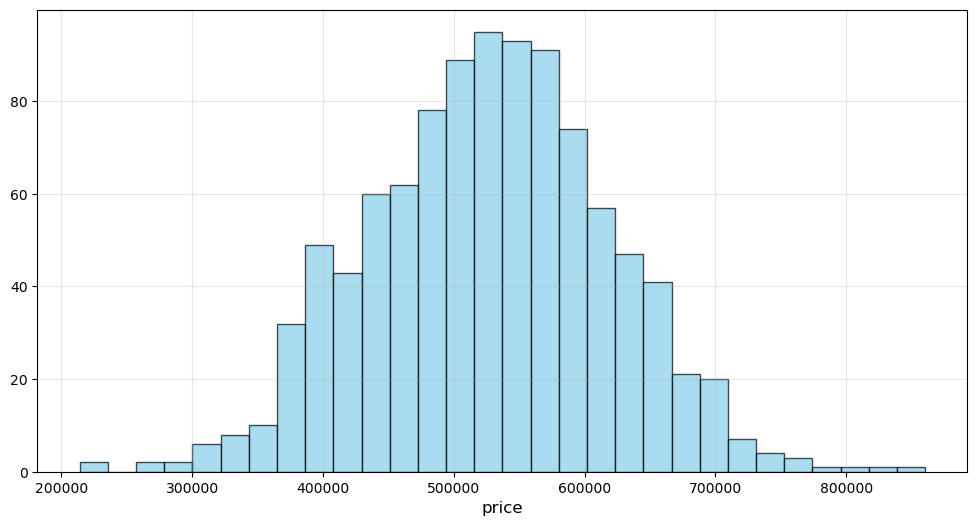

In [228]:
plt.figure(figsize=(12, 6))
plt.hist(df["price"], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('price', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

In [237]:
scalerx = preprocessing.StandardScaler()
x_scaled = scalerx.fit_transform(x)

x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x_scaled, y, test_size=0.5, random_state=42  
)

In [236]:
model_linear = linear_model.LinearRegression()
model_linear.fit(x_train, y_train)
y_pred_linear = model_linear.predict(x_test)

In [235]:
test = np.array([1800, 3, 2, 1995, 3.5, 1])
test_df = pd.DataFrame([test], columns=x_original.columns)
test_scaled = scalerx.transform(test_df)
test_pred = model_linear.predict(test_scaled)

print(f"{test_pred[0]:,.2f}")

494,514.91
